# 회귀(Regression)

예측할 값(Target)이 연속형(continuous) 데이터(float)인 지도 학습(Supervised Learning).

## <span style='background-color:#fff5b1'>회귀의 주요 평가 지표

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - scikit-learn 평가함수: mean_squared_error() 
    - <span style='background-color:#fff5b1'>교차검증시 지정할 문자열: 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    

>- y 는 정답, ^y는 예측값
>- GS, RS는 평가지표가 클수록 높은 순위이다.

- ### <span style='background-color:#fff5b1'>RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - mean_squared_error() 의 squared=False로 설정해서 계산. 또는 MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.
    - 교차검증시 지정할 문자열: 'neg_root_mean_squared_error'
    
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

- ### $R^2$ (R square, 결정계수)
    - 결정계수는 회귀모델에서 Feature(독립변수)들이 Target(종속변수)를 <span style='background-color:#fff5b1'>**얼마나 설명하는지를 나타내는 평가지표이다.**</span>
        - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값으로 계산한다.
        - 모델은 feature들을 이용해 값을 추론하므로 그 성능은 target에 대한 설명력으로 생각할 수 있다.
    - <span style='background-color:#fff5b1'>**1에 가까울 수록 좋은 모델.**</span>
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    - [참고](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}\\
    R^2 = 1 - \cfrac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

>- <span style='background-color:#fff5b1'><b style='font-size:1.3em'>$y_i$ : i번째 정답 값, </b></span>
>- <span style='background-color:#fff5b1'><b style='font-size:1.3em'>$\hat{y_i}$ : i 번째 예측 값, </b></span>
>- <span style='background-color:#fff5b1'><b style='font-size:1.3em'>$\bar{y}$ : y의 평균    </b></span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

### 예제

##### Dataset 생성
- make_xxxxx() 함수
    - 머신러닝 학습을 위한 dummy dataset 구현 함수
    - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
- make_regression(): 회귀 문제를 위한 dummy dataset 생성
- make_classification(): 분류 문제를 위한 dummy dataset 생성

In [14]:
X, y = make_regression(n_samples = 1000,  # 생성할 데이터 개수
                      n_features = 1,     # Feature의 개수
                      n_informative = 1,  # target(label)값에 영향을 주는 Feature의 개수
                      noise = 30,         # noise(잡음) 값 추가. => 모델이 찾을 수 없는 값. 
                      random_state = 0)   # ㄴ=> 범위로 지정: 0 ~ 지정한 값 중에 임의의 값을 사용.
print(X.shape, y.shape)

(1000, 1) (1000,)


In [15]:
print(X[:5])
print(y[:5])

[[-2.55298982]
 [ 1.76405235]
 [-1.79132755]
 [-1.2140774 ]
 [-1.4449402 ]]
[-226.98542474  165.24959267 -110.53873999  -83.35797108 -125.77525151]


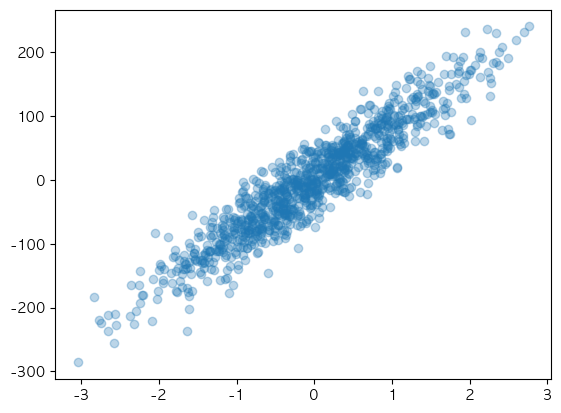

In [16]:
plt.scatter(X, y, alpha = 0.3)

> #### Noise란 
>  같은 Feature를 가진 데이터포인트가 다른 label을 가지는 이유를 Noise(노이즈)라고 한다. 단 그 이유는 현재 상태에선 모른다. 예를 들어 나이란 Feature가 있고 구매량이란 target이 있을때 같은 나이인데 구매량이 다른 경우 그 이유를 우리는 알 수 없다. 그 차이를 만드는 나이 이외의 Feature가 있는데 그것이 수집이 되지 않은 것이다.  그래서 데이터 수집하고 전처리 할 때 그 이유가 되는 Feature를 찾아야 한다. 찾으면 성능이 올라가는 것이고 못찾으면 모르는 이유가 되어 모델 성능이 떨어진다. 

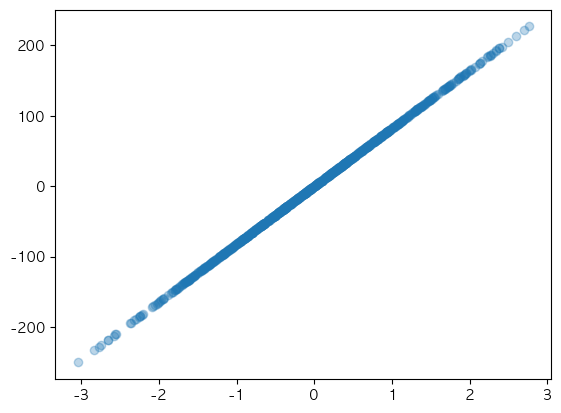

In [11]:
# noise 값이 없을 시
plt.scatter(X, y, alpha = 0.3)

In [18]:
# y의 정보
print(y.mean(), np.median(y))
print(y.min(), y.max())

-2.9353214065211493 -3.859887443278972
-286.10570741064424 240.32028057363925


##### 모델 생성, 학습

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

##### 평가

In [26]:
np.mean((y-pred)**2)

885.9735841406376

In [25]:
pred = lr.predict(X)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y, pred) # (정답값, 예측값)
rmse = mean_squared_error(y, pred, squared = False) # np.sqrt(mse)
r2 = r2_score(y, pred)
mae = mean_absolute_error(y, pred)

print(f'MSE: {mse}, RMSE: {rmse}, RMSE2: {np.sqrt(mse)}\n R2: {r2}, MAE: {mae}')

MSE: 885.9735841406376, RMSE: 29.765308399891268, RMSE2: 29.765308399891268
 R2: 0.8808989693851077, MAE: 23.627771430275853


##### 교차검증 (cross validation)

In [35]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(LinearRegression(),
                        X, y, cv = 4) # scoring = 'r2'(기본값) // scoring 생략 => 회귀: r2_score, 분류: accuracy
print(result)
print(result.mean())

[0.89476539 0.85829536 0.88648045 0.88280056]
0.8805854394305846


In [40]:
result = cross_val_score(LinearRegression(),
                        X, y, cv = 4,
#                         scoring = 'neg_mean_squared_error')
#                         scoring = 'neg_root_mean_squared_error')
                         scoring = 'neg_mean_absolute_error'
                        )
                         
                         
print(-result)          # 기본값 음수임
print(-result.mean())   # 기본값 음수임

[21.98313529 25.75860229 23.54541203 23.38231982]
23.667367357979494


##### 모델이 찾은 계수(coef, 가중치-weigth)와 절편(intercept, 편향-bias) 조회
- LinearRegression 모델은 선형 방정식을 이용해 예측값을 추론한다. 
- 학습이 끝나면 모델이 찾은 각 Feature에 곱해주는 계수와 절편을 다음 attribube로 조회할 수 있다.
    - coef_: Feature에 곱하는 가중치
    - intercept_: y절편. 모든 Feature가 0일때 예측값

In [41]:
lr.coef_ # 모든 X의 곱해진값 # feature 마다 각각 다른값들을 찾는다. (feature가 5개 => coef_ 도 5개)

array([82.01323352])

In [42]:
lr.intercept_  # y를 구하기 위한 X에 더해진 값.

0.7763275132894489

In [43]:
lr.predict(X[:3])

array([-208.60262243,  145.45196451, -146.136237  ])

In [45]:
# lr을 예측한 값과 동일.
lr.coef_[0] * X[:3] + lr.intercept_

array([[-208.60262243],
       [ 145.45196451],
       [-146.136237  ]])

##### X, y와 추론결과  시각화

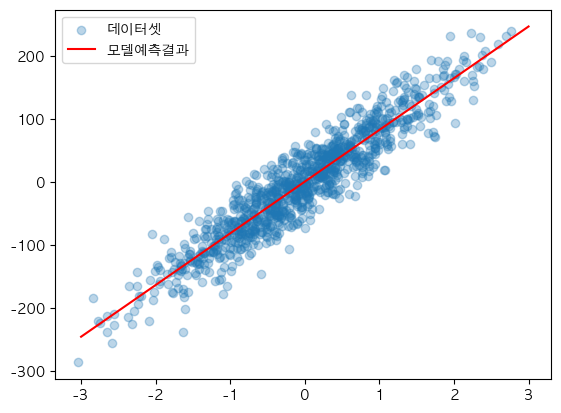

In [49]:
plt.scatter(X, y, alpha = 0.3, label = '데이터셋')
X_sample = np.linspace(-3, 3, 100)
y_sample = lr.predict(X_sample.reshape(-1, 1))

plt.plot(X_sample, y_sample, color = 'red', label = '모델예측결과')
plt.legend()
plt.show()

In [55]:
from metrics import print_metrics_regression as pmr
pmr(y, pred, '예제')

예제
MSE: 885.974, RMSE: 29.765, MAE: 23.628, R2: 0.881


> - mse.3f => 소수점 3자리수까지 반올림

## 기존 분류 모델의 회귀 모델

##### import

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from metrics import print_metrics_regression as pmr

from graphviz import Source

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# stratify = y ==> 분류 데이터셋 분리떄만 지정. (회귀에서는 지정하지 않는다.)

X_train.shape, X_test.shape

((800, 1), (200, 1))

##### 모델들 생성

In [83]:
knn = KNeighborsRegressor(n_neighbors = 3)
tree = DecisionTreeRegressor(max_depth = 3, random_state = 0)
rf = RandomForestRegressor(n_estimators = 200, max_depth = 3, random_state= 0)
gb = GradientBoostingRegressor(n_estimators= 200, max_depth= 1, random_state= 0)
lr = LinearRegression()
xgb = XGBRegressor(n_estimators = 200, max_depth = 1, random_state = 0)
svr = SVR()

estimators = [
    ('knn', knn),
    ('Decision Tree', tree),
    ('Random Forest', rf),
    ('Gradient Boosting', gb),
    ('Linear Regression', lr),
    ('XGBoost', xgb),
    ('SVM', svr)
]

##### 모델 학습 및 평가

In [84]:
for model_name, model in estimators:
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    pmr(y_train, pred_train, f'{model_name} - Train set')
    pmr(y_test, pred_test, f'{model_name} - Test set------------')
    print('='*50)

knn - Train set
MSE: 605.566, RMSE: 24.608, MAE: 19.608, R2: 0.921
knn - Test set------------
MSE: 1241.497, RMSE: 35.235, MAE: 27.796, R2: 0.806
Decision Tree - Train set
MSE: 999.747, RMSE: 31.619, MAE: 25.606, R2: 0.870
Decision Tree - Test set------------
MSE: 1057.638, RMSE: 32.521, MAE: 26.122, R2: 0.835
Random Forest - Train set
MSE: 871.589, RMSE: 29.523, MAE: 23.695, R2: 0.886
Random Forest - Test set------------
MSE: 913.618, RMSE: 30.226, MAE: 24.430, R2: 0.857
Gradient Boosting - Train set
MSE: 808.368, RMSE: 28.432, MAE: 22.647, R2: 0.895
Gradient Boosting - Test set------------
MSE: 876.818, RMSE: 29.611, MAE: 23.993, R2: 0.863
Linear Regression - Train set
MSE: 899.611, RMSE: 29.994, MAE: 23.768, R2: 0.883
Linear Regression - Test set------------
MSE: 832.134, RMSE: 28.847, MAE: 23.048, R2: 0.870
XGBoost - Train set
MSE: 818.143, RMSE: 28.603, MAE: 22.827, R2: 0.893
XGBoost - Test set------------
MSE: 891.954, RMSE: 29.866, MAE: 23.852, R2: 0.861
SVM - Train set
MSE: 233

##### Voting
- VotingRegressor 
    - 각 모델이 예측한 값의 평균을 출력한다.

In [85]:
estimators = [
    ('knn', knn),
    ('Decision Tree', tree),
    ('Random Forest', rf),
    ('Gradient Boosting', gb),
    ('Linear Regression', lr),
    ('XGBoost', xgb),
]

In [86]:
voting = VotingRegressor(estimators)
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('knn', KNeighborsRegressor(n_neighbors=3)),
                            ('Decision Tree',
                             DecisionTreeRegressor(max_depth=3,
                                                   random_state=0)),
                            ('Random Forest',
                             RandomForestRegressor(max_depth=3,
                                                   n_estimators=200,
                                                   random_state=0)),
                            ('Gradient Boosting',
                             GradientBoostingRegressor(max_depth=1,
                                                       n_estimators=200,
                                                       random_state=0)),
                            ('Linear Regression', LinearRegression...
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=1,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=200, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=0, ...))])

In [75]:
pred_train2 = voting.predict(X_train)
pred_test2 = voting.predict(X_test)
pmr(y_train, pred_train2)
print('--------------')
pmr(y_test, pred_test2)

MSE: 819.976, RMSE: 28.635, MAE: 22.990, R2: 0.893
--------------
MSE: 906.920, RMSE: 30.115, MAE: 24.207, R2: 0.858


In [79]:
# svm 없는 경우

pred_train2 = voting.predict(X_train)
pred_test2 = voting.predict(X_test)
pmr(y_train, pred_train2)
print('--------------')
pmr(y_test, pred_test2)

MSE: 765.933, RMSE: 27.675, MAE: 22.224, R2: 0.900
--------------
MSE: 899.324, RMSE: 29.989, MAE: 24.172, R2: 0.860


##### DecisionTreeRegressor Tree 시각화

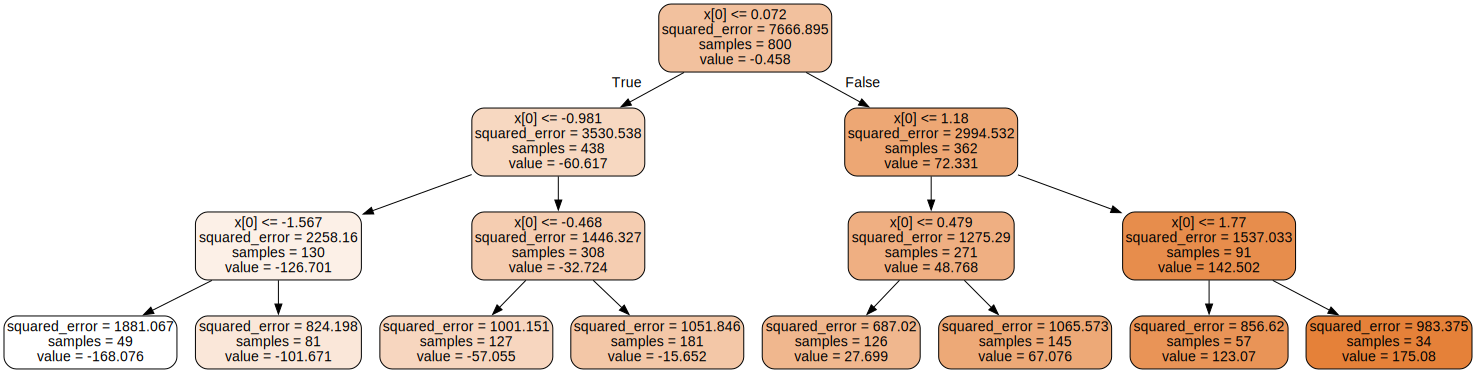

In [87]:
graph = Source(export_graphviz(tree,
                              rounded = True,
                              filled = True))
graph

In [89]:
np.sqrt(1881)

43.37049688440288